In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import datetime

In [2]:
barWidth = 0.9

#create bars
bars = [7.9, 23.1, 32.3, 25.7, 9.8, 8.5, 37.5, 26.8, 27.3, 36.7, 16.2]

#bar positions
r = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

var = ['Driving too Fast','SlipperySurf/WaterPooling','BadWeather','Congestion','FollowTooClose', ' Animal/Debris',
      'BadVisibility', 'Inattention','ImproperManeuver', 'VOSh', 'CurvePresent']

In [ ]:
#create plot
plt.hbar(r, bars, width = barWidth, color = (0.3,0.1,0.4,0.6), label = 'Support')

#plt.legend()

plt.ylabel('Support (%)')

plt.xticks([x + barWidth for x in range(len(r))], var, rotation = 90)

plt.savefig('frequent items', dpi = 300, bbox_inches = 'tight')
plt.show()

In [2]:
arm = pd.read_csv('fullarmtable.csv')

In [3]:
arm.head(3)

,CrashID,Lat,Long,CollisionDate,CollisionTime,rtunique,CurvePresent,GradePresent,BadVisibility,BadWeather,...,Animal/Debris,SlipperySurf/WaterPooling,EnvFactor_Other,Impaired,Dstracted,Inattention,DrivingTooFast,RightOfWay,ImproperManeuver,FollowTooClose
0,6363,38.20284,-85.68595,20180701,155,056-I-0264-010,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,6369,37.98286,-85.69970,20180701,600,015-I-0065-000,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,6370,38.48323,-85.26793,20180701,1302,052-I-0071-010,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [4]:
def get_time(x):
    x = int(x)
    hr = x//100
    mn = x-hr*100
    sc = 0
    tm = datetime.time(hr, mn, sc)
    return tm


def get_date(x):
    x = str(x)
    #dt=datetime.datetime.strptime(x, '%m/%d/%Y').date()
    dt = datetime.datetime.strptime(x, '%Y%m%d').date()
    return dt

arm['Time'] = arm['CollisionTime'].map(get_time)
arm['Date'] = arm['CollisionDate'].map(get_date)

In [11]:
arm.head()

,CrashID,Lat,Long,CollisionDate,CollisionTime,rtunique,CurvePresent,GradePresent,BadVisibility,BadWeather,...,Impaired,Dstracted,Inattention,DrivingTooFast,RightOfWay,ImproperManeuver,FollowTooClose,Time,Date,hour
0,6363,38.20284,-85.68595,20180701,155,056-I-0264-010,1,0,1,0,...,0,0,0,0,0,0,0,01:55:00,2018-07-01,1
1,6369,37.98286,-85.69970,20180701,600,015-I-0065-000,1,0,1,0,...,0,0,0,0,0,0,0,06:00:00,2018-07-01,6
2,6370,38.48323,-85.26793,20180701,1302,052-I-0071-010,1,1,0,0,...,0,0,0,0,0,1,0,13:02:00,2018-07-01,13
3,6372,38.10110,-84.48867,20180701,1115,034-I-0075-010,0,0,0,0,...,0,0,1,0,0,1,0,11:15:00,2018-07-01,11
4,6373,37.84862,-84.32989,20180701,1310,076-I-0075-000,0,0,0,0,...,0,0,0,0,0,0,0,13:10:00,2018-07-01,13


In [10]:
def get_hr(x):
    return x.hour

arm['hour'] = arm['Time'].map(get_hr)

In [12]:
arm.hour.unique()

array([ 1,  6, 13, 11, 10, 15, 14, 19, 20,  4, 22, 16, 23, 18,  8, 17,  7,
        9,  3, 12, 21,  2,  5,  0])

In [37]:
vsc = arm[arm.VOSh == 1].copy()

In [44]:
nvsc = arm[arm.VOSh == 0].copy()

In [38]:
vsc.sort_values('hour', ascending = True, inplace = True, na_position = 'last', ignore_index = True)

In [45]:
nvsc.sort_values('hour', ascending = True, inplace = True, na_position = 'last', ignore_index = True)

In [40]:
vsc.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [46]:
freqvsc = vsc.hour.value_counts().to_frame()

In [49]:
freqnvsc = nvsc.hour.value_counts().to_frame()

In [47]:
freqvsc.sort_index(inplace = True)

In [50]:
freqnvsc.sort_index(inplace = True)

In [48]:
freqvsc

,hour
0,14
1,7
2,11
3,9
4,8
5,16
6,55
7,127
8,115
9,73


In [51]:
freqnvsc

,hour
0,90
1,80
2,79
3,96
4,102
5,139
6,173
7,200
8,160
9,149


In [54]:
dt = freqvsc.merge(freqnvsc, left_index = True, right_index = True)

In [88]:
dt.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
vsc,14,7,11,9,8,16,55,127,115,73,83,83,114,117,161,191,233,278,169,83,61,51,21,23
nvsc,90,80,79,96,102,139,173,200,160,149,142,127,160,157,204,209,238,292,205,170,133,144,112,104


In [58]:
dt.rename(columns = {'hour_x':'vsc', 'hour_y':'nvsc'}, inplace = True)

In [60]:
import matplotlib.pyplot as plt
from math import pi

In [63]:
dt = dt.transpose()

In [79]:
dt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
vsc,14,7,11,9,8,16,55,127,115,73,83,83,114,117,161,191,233,278,169,83,61,51,21,23
nvsc,90,80,79,96,102,139,173,200,160,149,142,127,160,157,204,209,238,292,205,170,133,144,112,104


In [104]:
#number of variables
categories=list(dt)[0:]
N = len(categories)
N

24

In [105]:
values=dt.iloc[0].tolist()
values += values[:1]
values

[14,
 7,
 11,
 9,
 8,
 16,
 55,
 127,
 115,
 73,
 83,
 83,
 114,
 117,
 161,
 191,
 233,
 278,
 169,
 83,
 61,
 51,
 21,
 23,
 14]

In [106]:
len(values)

25

In [107]:
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


In [108]:
len(angles)

25

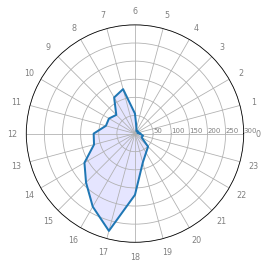

In [110]:
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.set_rlabel_position(0)
plt.yticks([50,100,150,200,250,300], ["50","100","150","200",'250','300'], color="grey", size=7)
plt.ylim(0,3_00)
ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)


In [87]:
len(angles)

24

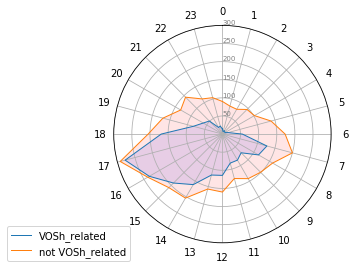

In [118]:
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([50,100,150,200,250,300], ["50","100","150","200",'250','300'], color="grey", size=7)
plt.ylim(0,3_00)

values=dt.iloc[0].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="VOSh_related")
ax.fill(angles, values, 'b', alpha=0.1)
        
values=dt.iloc[1].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="not VOSh_related")
ax.fill(angles, values, 'r', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig('crash spider', dpi = 300, bbox_inches = 'tight')
plt.show()